In [1]:
import pandas as pd
import numpy as np
import csv
import os
#import hdbscan
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load in Dataset Of Random Species

In [2]:
def  genereate_df_from_embeddings(file_path, species):
    size = 0
    data = np.matrix(np.arange(424))
    entries = os.scandir(file_path)#'./output/Caryothraustes')
    for entry in entries:
        try:
            if (entry.is_file()):
                path = entry.path
                f = open(path, "r", encoding="cp1252", errors='ignore')
                embedding = f.read().strip().split("\n")
                name = entry.name
                for em in embedding:
                    em = em.strip().split(",")
                    em_times = em.pop(0).split("\t")
                    em.insert(0, em_times[2])
                    em.insert(0, em_times[1])
                    em.insert(0, em_times[0])
                    em = [float(i) for i in em]
                    
                    em.insert(0, species)
                    em.insert(0, name.split(".")[0])

                    #if (data == None):
                    #    data = np.matrix(np.arange(len(em)))
                    #    size = len(em)
                    data = np.append(data, [em],axis=0)
        except Exception as e:
            print("issue with ", entry.name, e)
    data = np.delete(data, 0, 0)
    return pd.DataFrame(data = data, columns=np.append(["name", "species", "start", "end"], np.arange(420)))

Caryothraustes = genereate_df_from_embeddings('./output/Caryothraustes', "Caryothraustes canadensis")

In [3]:
file_paths = ['./output/Caryothraustes', './output/Lipaugus', './output/Anthus crenatus','./output/Hirundo aethiopica', './output/Mulleripicus pulverulentus']
species = ["Caryothraustes canadensis",  "Lipaugus vociferans", "Anthus crenatus", "Hirundo aethiopica", "Mulleripicus pulverulentus"]
df_list = []

for i in range(0, len(species)):
    df = genereate_df_from_embeddings(file_paths[i], species[i])
    df_list.append(df)
df_list
embeddings_df = pd.concat(df_list)

In [4]:
for i in range(420):
    embeddings_df[str(i)] = pd.to_numeric(embeddings_df[str(i)])

In [5]:
def get_species_label(animal):
    return species.index(animal)

In [6]:
cluster_data = embeddings_df.get( map(str, np.append(range(0,420), "species"))).assign(species=embeddings_df.get("species").apply(get_species_label))

In [7]:
cluster_data

,0,1,2,3,4,5,6,7,8,9,...,411,412,413,414,415,416,417,418,419,species
0,0.967806,0.769643,0.756692,0.527631,0.675048,0.600976,1.111168,1.413313,1.330342,0.756468,...,0.893902,0.171246,1.233183,0.583374,1.769806,1.383978,2.475166,1.078415,0.925694,0
1,1.037510,0.367679,0.888994,0.587892,1.099438,0.726024,1.458717,1.604337,0.958347,0.803813,...,0.813141,0.123987,0.694158,1.475667,1.093555,1.371023,2.103386,0.547020,0.743710,0
2,1.140484,0.451682,1.018024,0.501134,1.125137,1.123260,0.956831,1.808194,1.110360,0.663836,...,0.780600,0.022648,0.569220,1.441502,1.194814,1.776055,2.202230,0.326116,0.829030,0
3,0.528979,0.408542,0.387037,0.575231,0.896221,1.027779,1.528906,2.008421,1.317093,1.067263,...,0.632454,0.058461,0.723708,0.815625,1.495955,1.268945,2.037256,0.679940,0.429032,0
4,0.479268,0.233081,1.467099,0.380584,1.149037,0.581240,1.472090,1.880152,1.015008,0.737940,...,0.542426,0.275469,0.508092,0.847231,1.553738,1.313461,1.432835,0.665235,0.736251,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280,1.381676,0.468748,0.663441,0.501041,1.129288,0.981877,1.070357,0.591372,0.866726,1.032526,...,1.039565,0.672447,0.091795,1.663368,0.482087,1.012864,0.687840,0.481954,0.436725,4
281,0.841789,1.048085,0.450634,0.353154,1.427484,0.992976,0.483312,0.664289,0.924245,0.610640,...,0.548517,0.810128,0.443655,0.996459,0.613397,1.100424,0.932739,0.757559,0.313792,4
282,0.868418,0.613148,0.628652,0.386812,1.286935,1.005625,0.481344,0.611417,0.761647,0.644113,...,0.801083,0.798538,0.097524,0.875056,0.613701,0.771167,1.038458,0.415038,0.400380,4
283,0.832369,0.364247,0.674693,0.219149,0.939530,0.619524,0.467966,0.507843,0.527369,0.593541,...,0.561237,0.454302,0.245876,0.888644,0.296072,0.886418,0.563096,0.449758,0.320249,4


# Do centeroid distance predictions

In [8]:
import scipy

In [9]:
def compute_centeroid(df, cluster):
    df = df[df.get("species") == cluster].drop(columns=["species"])
    return df.sum(axis=0)/df.shape[0]

Split Data

In [10]:
cleaned_cluster_data = cluster_data.reset_index().drop(columns=["index"])
test = cleaned_cluster_data.sample(int(cleaned_cluster_data.shape[0] * 0.1)).sort_index(axis = 0)
test

,0,1,2,3,4,5,6,7,8,9,...,411,412,413,414,415,416,417,418,419,species
6,0.555536,0.341442,0.143662,0.895786,0.685314,1.126376,0.974429,1.725527,0.646137,0.755939,...,0.261124,0.571639,0.126372,0.860797,1.324912,1.489001,1.470830,0.404725,0.139849,0
10,0.351386,0.602537,0.018290,1.170860,1.946935,1.665339,0.547744,2.112402,1.461367,0.912879,...,0.362377,0.069282,0.637475,1.007056,2.080421,2.232117,1.680647,0.802416,0.563734,0
25,0.551304,0.758258,0.404602,0.739560,1.448069,0.794467,0.610227,1.621398,0.879700,1.273488,...,0.700465,0.709957,1.684513,1.027139,1.522513,0.653809,1.515762,1.434342,1.032883,0
36,0.690577,0.634650,0.759746,0.401826,0.395940,0.428392,1.504576,0.239155,0.638108,0.269684,...,0.655856,0.463719,0.358054,1.745201,0.903843,0.442607,0.225138,0.835963,0.464403,0
39,0.430355,1.147105,0.104302,0.809917,1.211165,0.964906,1.313162,1.206652,0.789171,0.936349,...,0.461015,0.234360,0.453586,0.764531,1.077893,0.726609,0.558616,0.398216,0.696450,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7344,0.330707,1.157851,0.398260,1.059880,0.148551,0.244429,0.741054,0.303321,0.715498,0.809436,...,0.206120,0.720354,0.185658,0.761411,0.192614,0.775114,0.596563,0.712727,0.553840,4
7352,0.347241,1.282139,0.480874,1.348103,0.476396,0.643337,1.067484,0.749010,0.685798,1.801510,...,0.867528,1.495986,0.333229,1.142094,0.090838,1.270749,1.266419,0.609233,0.158116,4
7382,0.702479,0.947504,0.869121,1.009646,0.327694,0.233858,1.007536,0.322470,1.017340,0.994690,...,0.579820,1.697795,0.081568,0.670578,0.664663,0.504269,0.300096,1.249356,0.481220,4
7403,0.364746,0.764692,0.264656,1.141897,0.325409,0.131503,0.703315,0.224212,0.740715,0.966561,...,0.148322,0.704985,0.861928,0.547912,0.363435,1.287087,0.572537,0.904710,0.917256,4


In [11]:
train = cleaned_cluster_data[~cleaned_cluster_data.index.isin(test.index)].sort_index(axis = 0)
train

,0,1,2,3,4,5,6,7,8,9,...,411,412,413,414,415,416,417,418,419,species
0,0.967806,0.769643,0.756692,0.527631,0.675048,0.600976,1.111168,1.413313,1.330342,0.756468,...,0.893902,0.171246,1.233183,0.583374,1.769806,1.383978,2.475166,1.078415,0.925694,0
1,1.037510,0.367679,0.888994,0.587892,1.099438,0.726024,1.458717,1.604337,0.958347,0.803813,...,0.813141,0.123987,0.694158,1.475667,1.093555,1.371023,2.103386,0.547020,0.743710,0
2,1.140484,0.451682,1.018024,0.501134,1.125137,1.123260,0.956831,1.808194,1.110360,0.663836,...,0.780600,0.022648,0.569220,1.441502,1.194814,1.776055,2.202230,0.326116,0.829030,0
3,0.528979,0.408542,0.387037,0.575231,0.896221,1.027779,1.528906,2.008421,1.317093,1.067263,...,0.632454,0.058461,0.723708,0.815625,1.495955,1.268945,2.037256,0.679940,0.429032,0
4,0.479268,0.233081,1.467099,0.380584,1.149037,0.581240,1.472090,1.880152,1.015008,0.737940,...,0.542426,0.275469,0.508092,0.847231,1.553738,1.313461,1.432835,0.665235,0.736251,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7431,1.381676,0.468748,0.663441,0.501041,1.129288,0.981877,1.070357,0.591372,0.866726,1.032526,...,1.039565,0.672447,0.091795,1.663368,0.482087,1.012864,0.687840,0.481954,0.436725,4
7432,0.841789,1.048085,0.450634,0.353154,1.427484,0.992976,0.483312,0.664289,0.924245,0.610640,...,0.548517,0.810128,0.443655,0.996459,0.613397,1.100424,0.932739,0.757559,0.313792,4
7433,0.868418,0.613148,0.628652,0.386812,1.286935,1.005625,0.481344,0.611417,0.761647,0.644113,...,0.801083,0.798538,0.097524,0.875056,0.613701,0.771167,1.038458,0.415038,0.400380,4
7434,0.832369,0.364247,0.674693,0.219149,0.939530,0.619524,0.467966,0.507843,0.527369,0.593541,...,0.561237,0.454302,0.245876,0.888644,0.296072,0.886418,0.563096,0.449758,0.320249,4


generate a list of centeroids for each species in training data set

In [12]:
centeroids = []
for cluster in np.unique(cluster_data.get("species")):
    centeroids.append(compute_centeroid(train, cluster).to_numpy())
centeroids = np.stack( centeroids, axis=0 )
centeroids    

False


C:\Users\seanh\AppData\Roaming\Python\Python37\site-packages\numpy\core\arrayprint.py:1449: UserWarning: legacy printing option can currently only be '1.13' or `False`
  ', ', prefix, suffix=suffix, legacy=True)


array([[5.02449884e-01, 6.48980534e-01, 5.16786859e-01, ...,
        8.2822582e-01, 5.29074092e-01, 6.82884728e-01],
       [5.70920392e-01, 4.41559732e-01, 6.02396499e-01, ...,
        1.35084228e+00, 6.29663985e-01, 5.45535811e-01],
       [8.11148249e-01, 6.43168267e-01, 1.16431554e+00, ...,
        6.42976408e-01, 7.4893176e-01, 7.34660442e-01],
       [6.59671442e-01, 5.76698677e-01, 1.05664417e+00, ...,
        4.48950631e-01, 8.08023715e-01, 6.0569619e-01],
       [5.52262073e-01, 9.47941176e-01, 5.11439079e-01, ...,
        7.38952765e-01, 6.95480253e-01, 6.20244651e-01]])

Based on training centeroids, attempt to predict species labels of testing dataset

In [13]:
#get_dist_train = train.reset_index().drop(columns=["index", "species"])
#dist_matrix_train = scipy.spatial.distance_matrix(get_dist_train.to_numpy(dtype=float),centeroids)

get_dist_test = test.reset_index().drop(columns=["index", "species"])
dist_matrix_test = scipy.spatial.distance_matrix(get_dist_test.to_numpy(dtype=float),centeroids)

In [14]:
test.reset_index().get("species")

0      0
1      0
2      0
3      0
4      0
      ..
738    4
739    4
740    4
741    4
742    4
Name: species, Length: 743, dtype: int64

In [15]:
dist_df = pd.DataFrame(dist_matrix_test).assign(species =test.reset_index().get("species"))
dist_df

,0,1,2,3,4,species
0,9.525707,9.979155,10.279502,10.360470,10.660687,0
1,11.290650,12.328724,12.722113,13.320878,12.448664,0
2,10.385231,12.451111,12.416919,13.599659,12.041389,0
3,7.812887,9.520072,9.496615,9.133995,9.270448,0
4,8.075098,10.855769,10.226944,10.976709,10.509525,0
...,...,...,...,...,...,...
738,7.945702,7.989464,8.766153,7.918684,5.696414,4
739,10.817900,11.474932,11.617789,12.158573,8.234127,4
740,8.969452,9.731130,10.162208,10.284485,9.066744,4
741,8.513986,8.948425,9.742468,9.423533,6.143965,4


In [16]:
stats = dist_df[dist_df.get("species") == 0].describe()
stats

,0,1,2,3,4,species
count,42.000000,42.000000,42.000000,42.000000,42.000000,42.0
mean,8.648302,9.804910,10.135838,10.279182,10.069668,0.0
std,1.324936,1.598096,1.123755,1.785354,1.204570,0.0
min,6.752618,7.106855,8.509612,7.436479,8.439165,0.0
25%,7.816280,8.567256,9.397556,9.181305,9.276783,0.0
50%,8.421364,9.635990,9.870980,10.127579,9.900520,0.0
75%,9.148875,10.627651,10.481346,11.205467,10.606294,0.0
max,14.388476,14.782755,14.079480,15.412822,14.768894,0.0


In [17]:
def outliers(distance_row):
    stats = dist_df[dist_df.get("species") == distance_row.get("species")].describe()
    low = stats.loc["25%"]
    high = stats.loc["75%"]
    return ((distance_row < high))

outliers(dist_df.iloc[4])

0           True
1          False
2           True
3           True
4           True
species    False
dtype: bool

In [18]:
non_outliers = dist_df.apply(outliers, axis=1).assign(species=dist_df.get("species"))
non_outliers

,0,1,2,3,4,species
0,False,True,True,True,False,0
1,False,False,False,False,False,0
2,False,False,False,False,False,0
3,True,True,True,True,True,0
4,True,False,True,True,True,0
...,...,...,...,...,...,...
738,True,True,True,True,True,4
739,False,False,False,False,True,4
740,True,True,True,True,False,4
741,True,True,True,True,True,4


In [19]:
def is_likely_outlier(row):
    outliers_detected = non_outliers.iloc[row]
    embedding_data = test.iloc[row]
    return outliers_detected.loc[outliers_detected.loc["species"]]
    

In [20]:
is_likely_outlier(0)

False

In [21]:
def create_species_predictions(dist_matrix):
    species_predicted = np.array([])
    for i in range(len(dist_matrix)):
        species_predicted = np.append(species_predicted, np.where(dist_matrix[i] == min(dist_matrix[i])))
    return species_predicted

species_predicted = create_species_predictions(dist_matrix_test)
species_predicted

False


C:\Users\seanh\AppData\Roaming\Python\Python37\site-packages\numpy\core\arrayprint.py:1449: UserWarning: legacy printing option can currently only be '1.13' or `False`
  ', ', prefix, suffix=suffix, legacy=True)


array([0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00,
       0.e+00, 0.e+00, 3.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00,
       0.e+00, 3.e+00, 0.e+00, 1.e+00, 3.e+00, 0.e+00, 1.e+00, 0.e+00,
       0.e+00, 0.e+00, 0.e+00, 1.e+00, 1.e+00, 3.e+00, 0.e+00, 0.e+00,
       2.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00, 0.e+00,
       0.e+00, 0.e+00, 1.e+00, 1.e+00, 1.e+00, 1.e+00, 1.e+00, 1.e+00,
       1.e+00, 1.e+00, 1.e+00, 1.e+00, 1.e+00, 1.e+00, 1.e+00, 1.e+00,
       1.e+00, 1.e+00, 1.e+00, 1.e+00, 1.e+00, 1.e+00, 1.e+00, 1.e+00,
       1.e+00, 1.e+00, 1.e+00, 1.e+00, 1.e+00, 1.e+00, 1.e+00, 1.e+00,
       1.e+00, 1.e+00, 1.e+00, 1.e+00, 1.e+00, 1.e+00, 1.e+00, 0.e+00,
       1.e+00, 1.e+00, 1.e+00, 1.e+00, 1.e+00, 1.e+00, 1.e+00, 1.e+00,
       1.e+00, 1.e+00, 1.e+00, 1.e+00, 1.e+00, 1.e+00, 1.e+00, 1.e+00,
       0.e+00, 1.e+00, 1.e+00, 1.e+00, 1.e+00, 1.e+00, 1.e+00, 1.e+00,
       1.e+00, 1.e+00, 1.e+00, 1.e+00, 1.e+00, 1.e+00, 1.e+00, 1.e+00,
      

In [22]:
len(species_predicted)

743

In [23]:
test

,0,1,2,3,4,5,6,7,8,9,...,411,412,413,414,415,416,417,418,419,species
6,0.555536,0.341442,0.143662,0.895786,0.685314,1.126376,0.974429,1.725527,0.646137,0.755939,...,0.261124,0.571639,0.126372,0.860797,1.324912,1.489001,1.470830,0.404725,0.139849,0
10,0.351386,0.602537,0.018290,1.170860,1.946935,1.665339,0.547744,2.112402,1.461367,0.912879,...,0.362377,0.069282,0.637475,1.007056,2.080421,2.232117,1.680647,0.802416,0.563734,0
25,0.551304,0.758258,0.404602,0.739560,1.448069,0.794467,0.610227,1.621398,0.879700,1.273488,...,0.700465,0.709957,1.684513,1.027139,1.522513,0.653809,1.515762,1.434342,1.032883,0
36,0.690577,0.634650,0.759746,0.401826,0.395940,0.428392,1.504576,0.239155,0.638108,0.269684,...,0.655856,0.463719,0.358054,1.745201,0.903843,0.442607,0.225138,0.835963,0.464403,0
39,0.430355,1.147105,0.104302,0.809917,1.211165,0.964906,1.313162,1.206652,0.789171,0.936349,...,0.461015,0.234360,0.453586,0.764531,1.077893,0.726609,0.558616,0.398216,0.696450,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7344,0.330707,1.157851,0.398260,1.059880,0.148551,0.244429,0.741054,0.303321,0.715498,0.809436,...,0.206120,0.720354,0.185658,0.761411,0.192614,0.775114,0.596563,0.712727,0.553840,4
7352,0.347241,1.282139,0.480874,1.348103,0.476396,0.643337,1.067484,0.749010,0.685798,1.801510,...,0.867528,1.495986,0.333229,1.142094,0.090838,1.270749,1.266419,0.609233,0.158116,4
7382,0.702479,0.947504,0.869121,1.009646,0.327694,0.233858,1.007536,0.322470,1.017340,0.994690,...,0.579820,1.697795,0.081568,0.670578,0.664663,0.504269,0.300096,1.249356,0.481220,4
7403,0.364746,0.764692,0.264656,1.141897,0.325409,0.131503,0.703315,0.224212,0.740715,0.966561,...,0.148322,0.704985,0.861928,0.547912,0.363435,1.287087,0.572537,0.904710,0.917256,4


Assign these predicted species to test dataset

In [24]:
dist_df.reset_index().get("index").apply(is_likely_outlier)

0      False
1      False
2      False
3       True
4       True
       ...  
738     True
739     True
740    False
741     True
742     True
Name: index, Length: 743, dtype: bool

In [25]:
centeroid_work = test.reset_index().assign(
        species_predicted=species_predicted,
        outlier=dist_df.reset_index().get("index").apply(is_likely_outlier)
       ).get(["species", "species_predicted", "outlier"])
centeroid_work

,species,species_predicted,outlier
0,0,0.0,False
1,0,0.0,False
2,0,0.0,False
3,0,0.0,True
4,0,0.0,True
...,...,...,...
738,4,4.0,True
739,4,4.0,True
740,4,0.0,False
741,4,4.0,True


In [26]:
false_positives = centeroid_work[(centeroid_work.species != centeroid_work.species_predicted) & (centeroid_work.get("outlier") == True)]
false_positives.shape[0]

45

In [27]:
centeroid_work[(centeroid_work.species != centeroid_work.species_predicted)].shape[0]

78

Proportions of incorrectly labeled data

In [28]:
false_positives.shape[0]/centeroid_work.shape[0]

0.06056527590847914

In [29]:
false_positives[false_positives.get("outlier") == False].shape[0]/centeroid_work.shape[0]

0.0

In [30]:
centeroid_work[centeroid_work.get("outlier") == False].shape[0]/centeroid_work.shape[0]

0.253028263795424

====================================================

In [31]:
centeroids = []
for cluster in np.unique(cluster_data.get("species")):
    centeroids.append(compute_centeroid(cleaned_cluster_data, cluster).to_numpy())
centeroids = np.stack( centeroids, axis=0 )
get_dist_test = cluster_data.drop(columns=["species"])
dist_matrix_all = scipy.spatial.distance_matrix(get_dist_test.to_numpy(dtype=float),centeroids)
species_predicted = create_species_predictions(dist_matrix_all)
species_predicted

False


C:\Users\seanh\AppData\Roaming\Python\Python37\site-packages\numpy\core\arrayprint.py:1449: UserWarning: legacy printing option can currently only be '1.13' or `False`
  ', ', prefix, suffix=suffix, legacy=True)


array([0.e+00, 0.e+00, 0.e+00, ..., 4.e+00, 4.e+00, 4.e+00])

# Visualizations

In [32]:
pca = PCA(n_components = 3) # Default n_components = min(n_samples, n_features)
X_train_pc = pca.fit_transform(embeddings_df.get( map(str, range(0,420))))

pd.DataFrame(pca.components_.T)
X_train_pc
pca_embeddings = pd.DataFrame(data={"cluster": species_predicted, "species": list(embeddings_df.get("species").apply(get_species_label))})
pca_embeddings = pd.concat([pca_embeddings, pd.DataFrame(X_train_pc)], axis=1)
pca_embeddings.columns = ["species_predicted", "species", "x", "y", "z"]
#pca_embeddings = pca_embeddings.assign(species=embeddings_df.get("species"))
pca_embeddings

,species_predicted,species,x,y,z
0,0.0,0,2.919044,-0.199620,3.432085
1,0.0,0,2.832059,0.597257,3.707506
2,0.0,0,4.466963,0.010910,4.189770
3,0.0,0,2.231342,-0.303444,3.319991
4,0.0,0,2.430436,-0.125230,2.824897
...,...,...,...,...,...
7431,4.0,4,1.836399,1.619820,2.354213
7432,4.0,4,1.661936,0.337690,3.517869
7433,4.0,4,0.581084,1.310063,2.584478
7434,4.0,4,-3.126807,1.663887,1.818653


## Species Predicted In Test Sample

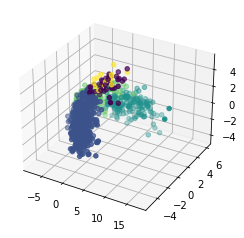

In [33]:
#cleaned_cluster_data[~cleaned_cluster_data.index.isin(test.index)].sort_index(axis = 0)
embeddings_to_plot = pca_embeddings[pca_embeddings.index.isin(test.index)].sort_index(axis = 0)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
plot = ax.scatter(embeddings_to_plot.get("x"), embeddings_to_plot.get("y"),embeddings_to_plot.get("z"), c=embeddings_to_plot.get("species_predicted"))
plot;

## Actual Species In Test Sample

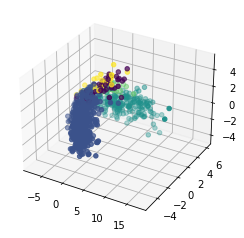

In [34]:
embeddings_to_plot = pca_embeddings[pca_embeddings.index.isin(test.index)].sort_index(axis = 0)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
plot = ax.scatter(embeddings_to_plot.get("x"), embeddings_to_plot.get("y"),embeddings_to_plot.get("z"), c=embeddings_to_plot.get("species"))
plot;

## Species Predicted != Species Labels in Test Sample

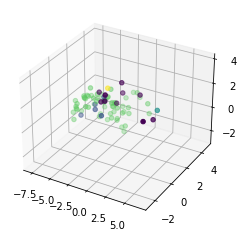

In [35]:
embeddings_to_plot = pca_embeddings[(pca_embeddings.index.isin(test.index)) & (pca_embeddings.species != pca_embeddings.species_predicted)]
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
plot = ax.scatter(embeddings_to_plot.get("x"), embeddings_to_plot.get("y"),embeddings_to_plot.get("z"), c=embeddings_to_plot.get("species_predicted"))
plot;

## Species Predicted == Species Labels

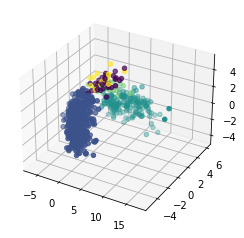

In [36]:
embeddings_to_plot = pca_embeddings[(pca_embeddings.index.isin(test.index)) & (pca_embeddings.species == pca_embeddings.species_predicted)]
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
plot = ax.scatter(embeddings_to_plot.get("x"), embeddings_to_plot.get("y"),embeddings_to_plot.get("z"), c=embeddings_to_plot.get("species_predicted"))
plot;

All Data Again


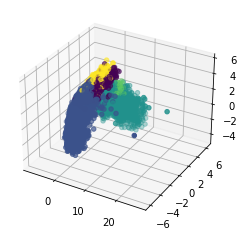

In [37]:
embeddings_to_plot = pca_embeddings
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
plot = ax.scatter(embeddings_to_plot.get("x"), embeddings_to_plot.get("y"),embeddings_to_plot.get("z"), c=embeddings_to_plot.get("species"))
plot;

# Conclusion?

- Promsing sign we can use simple centorids to expand birdnet's ablity without needing to retrain birdnet
- When birds cluster together, it may confuse this algorithm